In [1]:
# importing libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# importing the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# feature separation into features (x), and labels (y)
x_train = train.iloc[:, :-1].values  # Features (all but the last column)
y_train = train.iloc[:, -1].values   # Labels (last column)

x_test = test.iloc[:, :-1].values  # Features (all but the last column)
y_test = test.iloc[:, -1].values   # Labels (last column)

In [4]:
# nomalization of features
x_train = (x_train/255.0).astype(np.float32)
x_test = (x_test/255.0).astype(np.float32)

y_train = y_train.copy()
y_test = y_test.copy()

In [5]:
# Reshape the data to (num_samples, 32, 32, 3) which is acceptable by the CNN
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)


In [6]:
# splitting the training data into training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
# building the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# compiling the model
model.compile()

# model summary
model.summary()

C:\Users\digital world\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Converting the training labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
# training the model
training = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=32)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2660 - loss: 1.9753
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4613 - loss: 1.5105
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5271 - loss: 1.3369
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5654 - loss: 1.2127
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6120 - loss: 1.0953
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6444 - loss: 0.9969
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6770 - loss: 0.9097
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7133 - loss: 0.8085
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7422 - loss: 0.7327
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7583 - loss: 0.6744
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7897 - loss: 0.5893
Epoch 12

In [10]:
# evaluate model perfomrance
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5678 - loss: 2.8592


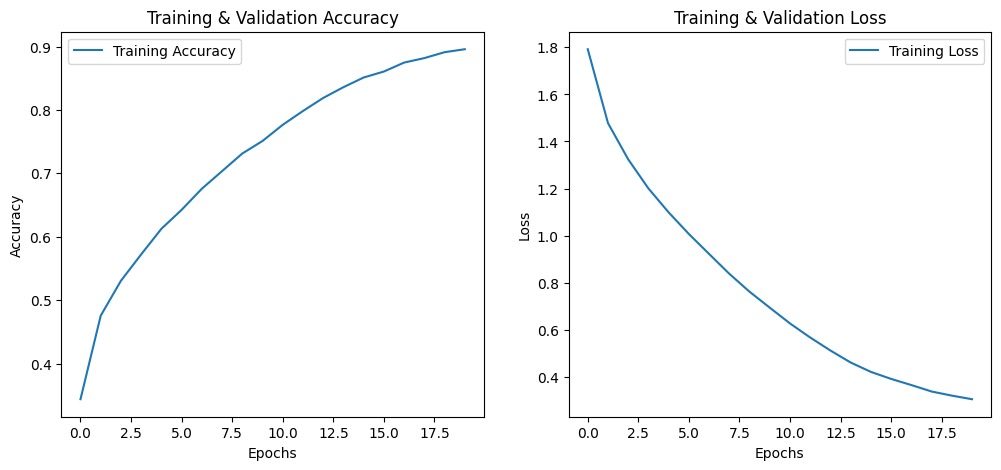

In [11]:
# visualization

## accuracy
plt.figure(figsize=(12, 5))

# training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(training.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in training.history:
    plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(training.history['loss'], label='Training Loss')
if 'val_loss' in training.history:
    plt.plot(training.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()